# Lista 1 - Machine Learning

### Brenda Quesada Prallon
(Discuti as questões com o Raul Guarini)

#### Exercício 1.10

In [1]:
import random

In [23]:
def flip_n_coins(n):
    coins = list()
    for i in range(n):
        heads = 0
        for j in range(10):
            heads += random.randint(0,1)
        coins.append(heads/10)
    return(coins)

In [27]:
coins = flip_n_coins(1000)
coin_0 = coins[0]
coin_random = random.choice(coins)
coin_min = min(coins)

##### a) 
A priori, a média $\mu$ que é a fração de caras esperadas em um lançamento é 1/2 para as 3 moedas, pois qualquer moeda tem probabilidade 1/2 de sair cara. No entanto, é interessante notar que, quando definimos essas moedas como variáveis aleatórias, temos:
##### Média da primeira moeda: 
$$\mu=\sum_{i=0}^{10} {10\choose i}\frac{i}{10}\frac{1}{2}^{10} = \frac{1}{2}$$
##### Média da moeda aleatória:
Lembrando que os lançamentos são iid, temos que a média da moeda aleatória é igual à média da primeira moeda
$$\mu=\sum_{i=0}^{10} {10\choose i}\frac{i}{10}\frac{1}{2}^{10} = \frac{1}{2}$$
##### Média da moeda mínimo:
Seja Z o mínimo do número de caras das moedas. Então:
$$ 1 - F_Z(z) = P(min(M_1, M_2, ..., M_{1000}) > z) = P(M_1>z, M_2>z, ... M_{1000}>z) $$
Pela independência dos lançamentos:
$$ 1 - F_Z(z) = P(M_1>z)P(M_2>z)...P(M_{1000}>z)$$
Por serem identicamente distribuídos:
$$ 1 - F_Z(z) = P(M_1>z)^{1000} = (1 - P(M_1 \leq{z}))^{1000} = (1 - \sum_{i=0}^{z} {10\choose i}\frac{1}{2}^{10})^{1000}$$
$$ F_Z(z) = 1 - (1 - \sum_{i=0}^{z} {10\choose i}\frac{1}{2}^{10})^{1000}$$
$$P(Z = z) = F_Z(z) - F_Z(z-1) = (1 - \sum_{i=0}^{z-1} {10\choose i}\frac{1}{2}^{10})^{1000} - (1 - \sum_{i=0}^{z} {10\choose i}\frac{1}{2}^{10})^{1000}$$
Portanto:
$$\mu=\sum_{z=0}^{10} {\frac{z}{10}((1 - \sum_{i=0}^{z-1} {10\choose i}\frac{1}{2}^{10})^{1000} - (1 - \sum_{i=0}^{z} {10\choose i}\frac{1}{2}^{10})^{1000})}$$
$$\mu = 0.0376$$

In [69]:
def repeat_experiment(n):
    coins_0 = list()
    coins_random = list()
    coins_min = list()
    for i in range(n):
        coins = flip_n_coins(1000)
        coins_0.append(coins[0])
        coins_random.append(random.choice(coins))
        coins_min.append(min(coins))
    return(coins_0, coins_random, coins_min)

In [39]:
experiment = repeat_experiment(100000)
coins_0 = experiment[0]
coins_random = experiment[1]
coins_min = experiment[2]

In [40]:
import pickle
with open('experiment.pickle', 'wb') as handle:
    pickle.dump(experiment, handle, protocol=pickle.HIGHEST_PROTOCOL)

##### b)

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

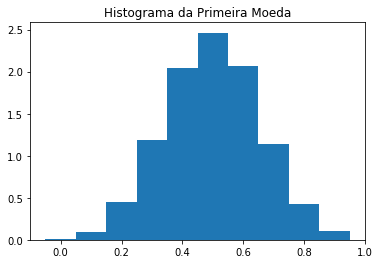

In [78]:
plt.hist(coins_0, bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], align = 'left', density = True)
plt.title("Histograma da Primeira Moeda")
plt.show()

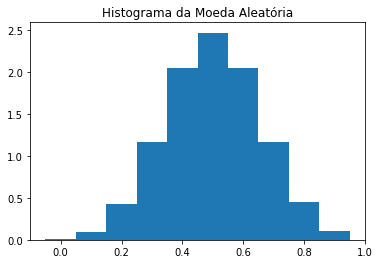

In [79]:
plt.hist(coins_random, bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], align = 'left', density = True)
plt.title("Histograma da Moeda Aleatória")
plt.show()

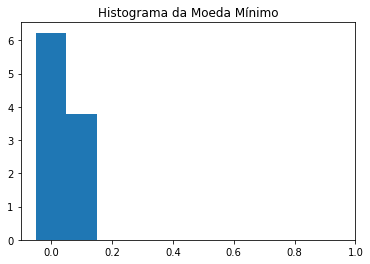

In [80]:
plt.hist(coins_min, bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], align = 'left', density = True)
plt.title("Histograma da Moeda Mínimo")
plt.show()

In [63]:
import numpy as np

In [125]:
epslons = np.linspace(0,1,101)
probs_coins_0 = list()
probs_coins_random = list()
probs_coins_min = list()
for epslon in epslons:
    probs_coins_0.append(sum(1 for x in coins_0 if x > (epslon + 1/2) or x < (-epslon + 1/2))/100000)
    probs_coins_random.append(sum(1 for x in coins_random if x > (epslon + 1/2) or x < (-epslon + 1/2))/100000)
    probs_coins_min.append(sum(1 for x in coins_min if x > (epslon + 1/2) or x < (-epslon + 1/2))/100000)

In [120]:
hoeffding_bound = list()
for epslon in epslons:
    hoeffding_bound.append(2*np.exp(-2*((epslon)**2)*10))

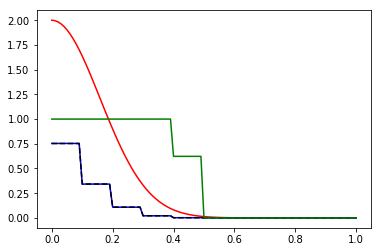

In [126]:
plt.plot(epslons, hoeffding_bound, 'r-', epslons, probs_coins_0, 'b-', epslons, probs_coins_random, 'k--',
        epslons, probs_coins_min, 'g-')
plt.show()

##### d) 
A primeira moeda e a moeda aleatória respeitam o bound de Hoaffding, pois suas hipóteses não dependem dos dados. Já a moeda mínimo depende dos dados.

##### e)
Nesse experimento, é como se tivéssemos 1000 bins e uma amostra de tamanho 10 para cada bin. A fração de caras esperada ($\mu$) é 1/2 para cada bin, e a fração realizada depende de cada amostra. Sabemos que, individualmente, ou seja, considerando cada bin separadamente, essas moedas atendem ao bound de Hoeffding. Como o primeiro bin (primeira meoda) e um bin aleatório (moeda aleatória) são independentes dos outros bins, então respeitam esse bound. O bin com a mínima fração de caras realizada, no entanto, claramente depende da realização das outras amostras dos outros bins. Por isso o bound de Hoefdding não se aplica.

#### Exercício 1.11

##### a)
Não podemos garantir que S produz uma hipótese que performa melhor do que uma hipótese aleatória fora de D, pois não conhecemos o mundo fora de D. Podemos ver isso com um exemplo: é possível, apesar de muito improvável, que a amostra tenha 20 elementos iguais a 1, mas que a população tenha na verdade uma proporção de 10% de 1's. Nesse caso, um algoritmo aleatório é melhor do que S, que sempre iria prever 1. 

##### b)
É possível que nesse caso C seja melhor do que S, apesar de altamente improvável. Por exemplo, se $P(f(x) = +1) = 0.1$, então a amostra D ocorre com probabilidade ${0.1}^{25} > 0$. Nesse caso, C gera um ero fora da amostra de 10%, mas S gera um erro de 90%.

##### c) 
S vai produzir uma hipótese melhor do que C nesse caso se S = +1 e C =-1, ou seja, se, em D, temos mais +1's do que -1's:
$$\sum_{i=13}^{25} {25\choose i}({0.9})^{i}({0.1})^{25-i} \approx 1$$ 

##### d)
Não existe nenhum valor de p que faça com que seja mais provável C produzir uma hipótese melhor do que S. C só produz um resultado fora da amostra melhor do que S se a amostra D "erra" a proporção populacional, ou seja, se ocorrem mais +1's que -1's na amostra mas o contrário na população, ou vice-versa. Esses cenários, no entanto, só ocorrem com probabilidade menor do que 0.5, a não ser quando p = 0.5; nesse caso, as duas hipóteses tem erro fora da amostra de 50%.

#### Problema 1.5

##### a)
OBS: fiz com $\eta$ = 10, pois com 100 os valores iam para infinito muito rápido.

In [127]:
import random

In [313]:
training_points = [[random.uniform(-1, 1), random.uniform(-1,1)] for k in range(100)]
testing_points = [[random.uniform(-1, 1), random.uniform(-1,1)] for k in range(1000)]
w = [random.uniform(-1000, 1000), random.uniform(-1000, 1000), random.uniform(-1000, 1000)]

def classification(point, w):
    return(np.sign(w[0] + w[1]*point[0] + w[2]*point[1]))

y_training = [classification(pt, w) for pt in training_points]
y_testing = [classification(pt, w) for pt in testing_points]

In [314]:
def training_algorithm(ni, points, true_w):
    w = [0,0,0]
    for i in range(1000):
        #missclass = [pt for pt in points if classification(pt, true_w) != classification(pt,w)]
        #if missclass == []:
            #break
        #point = random.sample(missclass, 1)[0]
        point = random.sample(points, 1)[0]
        x = [1]
        x.extend(point)
        s = sum(np.multiply(w, x))
        y = classification(point, true_w)
        if y*s <= 1:
            w = list(np.add(w, np.multiply(ni*(y-s), x)))
    return(w)

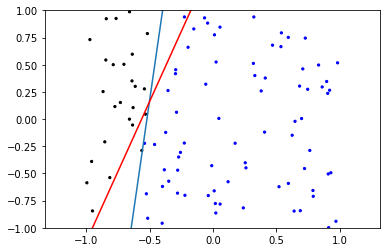

In [320]:
x = [point[0] for point in training_points]
y = [point[1] for point in training_points]
w_estimado = training_algorithm(10, training_points, w)
def abline(slope, intercept, style):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, style)
plt.scatter(x, y, c = ['b' if y == 1 else 'k' for y in y_training], s=5, linewidth=1)
abline(-w[1]/w[2], -w[0]/w[2], '-')
abline(-w_estimado[1]/w_estimado[2], -w_estimado[0]/w_estimado[2], 'r')
plt.ylim(-1,1)
plt.show()

A linha azul representa a reta verdadeira e a linha vermelha representa a reta estimada.

In [315]:
def calcula_erro_teste(ni):
    w_estimado = training_algorithm(ni, training_points, w)
    g = [classification(pt, w_estimado) for pt in testing_points]
    erro_teste = 0
    for i in range(len(g)):
        if g[i] != y_testing[i]:
            erro_teste += 1
    return(erro_teste/len(g))
    

O erro é dado por:

In [321]:
print(calcula_erro_teste(10))

0.217


##### b)

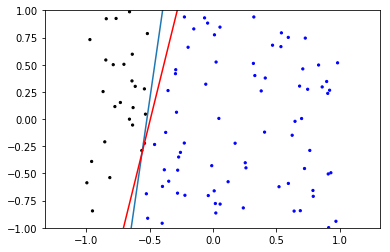

In [322]:
x = [point[0] for point in training_points]
y = [point[1] for point in training_points]
w_estimado = training_algorithm(1, training_points, w)
def abline(slope, intercept, style):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, style)
plt.scatter(x, y, c = ['b' if y == 1 else 'k' for y in y_training], s=5, linewidth=1)
abline(-w[1]/w[2], -w[0]/w[2], '-')
abline(-w_estimado[1]/w_estimado[2], -w_estimado[0]/w_estimado[2], 'r')
plt.ylim(-1,1)
plt.show()

In [323]:
print(calcula_erro_teste(1))

0.037


##### c)

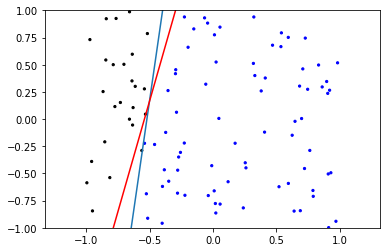

In [328]:
x = [point[0] for point in training_points]
y = [point[1] for point in training_points]
w_estimado = training_algorithm(0.01, training_points, w)
def abline(slope, intercept, style):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, style)
plt.scatter(x, y, c = ['b' if y == 1 else 'k' for y in y_training], s=5, linewidth=1)
abline(-w[1]/w[2], -w[0]/w[2], '-')
abline(-w_estimado[1]/w_estimado[2], -w_estimado[0]/w_estimado[2], 'r')
plt.ylim(-1,1)
plt.show()

In [329]:
print(calcula_erro_teste(0.01))

0.029


##### d)

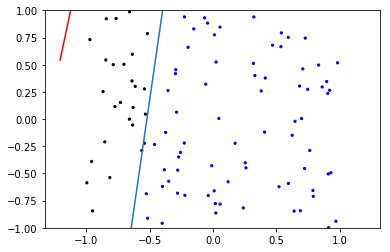

In [333]:
x = [point[0] for point in training_points]
y = [point[1] for point in training_points]
w_estimado = training_algorithm(0.0001, training_points, w)
def abline(slope, intercept, style):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, style)
plt.scatter(x, y, c = ['b' if y == 1 else 'k' for y in y_training], s=5, linewidth=1)
abline(-w[1]/w[2], -w[0]/w[2], '-')
abline(-w_estimado[1]/w_estimado[2], -w_estimado[0]/w_estimado[2], 'r')
plt.ylim(-1,1)
plt.show()

In [332]:
print(calcula_erro_teste(0.0001))

0.217


##### e)
Os resultados obtidos sugerem que existe algum $\eta$ que "minimiza" o erro do algoritmo fora da amostra para um número fixo de iterações. Esses erros foram maiores quando $\eta = 10$ e $\eta = 0.0001$, sendo este último o pior caso, provavelmente pois, sendo um número pequeno, precisaria de muito mais interações para aprender. Por outro lado, para um $\eta$ muito grande, como seria o caso de 100, o algoritmo vai muito rapidamente para infinito, e não converge. O melhor resultado fora da amostra foi obtido com $\eta = 0.01$.

#### Problema 1.10

##### a)
$$ E_{off}(h,f) = \left\{\begin{array}{ll}
                  \frac{1}{2} \text{, se M é par}\\
                  \frac{M+1}{2M} \text{, se M e N são ímpares}\\
                  \frac{M-1}{2M} \text{, se M é ímpar e N é par}
                \end{array}
                \right. 
                = \frac{1}{2}\times\frac{1}{2} + \frac{M+1}{2M}\times\frac{1}{4} + \frac{M-1}{2M}\times\frac{1}{4}
                = \frac{1}{2}$$

##### b)
Como N é fixo, podemos definir $f(x_n)$ como dependente de n. Para um conjunto fixo D de $y_ns$ existem várias combinações de funções f que podem gerar D em um 'noiseless setting', mantendo fixas as primeiras N posições, ou seja, há $\sum_{i=N+1}^{N+M} {N+M\choose i} = 2^M$ funções possíveis.

##### c)
$E_{off}(h,f) = \frac{k}{M}$ se $\sum_{m=1}^{M} {[[h(x_{N+m}) \neq f(x_{N+m})]]} = k$, ou seja, temos ${M\choose k}$ funções posíveis para esse resultado.

##### d)
Note que o erro esperado off-training é dado por:
$$E_f[E_{off}(h,f)] = \frac{1}{M}E_f(\sum_{m=1}^{M} {[[h(x_{N+m}) \neq f(X_{N+m})]])}$$
mas note que 
$$E_f(\sum_{m=1}^{M} {[[h(x_{N+m}) \neq f(X_{N+m})]])} = \sum_{m=1}^{M} {\frac{1}{2^{M}}m{M\choose{m}}} = \frac{1}{2^M} \sum_{m=1}^{M} {m{M\choose{m}}}$$
Então
$$E_f[E_{off}(h,f)] = \frac{1}{M}\frac{1}{2^M} \sum_{m=1}^{M} {m{M\choose{m}}} = \frac{1}{2}$$

##### e)
Ora, considerando que estamos em um noiseless setting, temos que, pela expressão acima, $E_f[E_{off}(h,f)]$ não depende de h. Logo, para quaisquer aloritmos determinísticos, o erro esperado fora da amostra é o mesmo, assumindo que todas as fs possíveis são equiprováveis.